In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv("cvdata.csv");

# Data Preprocessing

In [179]:
df.head()

,Category,Resume,State
0,Data Science,Skills * Programming Languages: Python (pandas...,Accept
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Accept
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",reject
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Accept
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Accept


In [180]:
df.rename(columns = {'State':'target'},inplace=True)

In [181]:
df.head()

,Category,Resume,target
0,Data Science,Skills * Programming Languages: Python (pandas...,Accept
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Accept
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",reject
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Accept
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Accept


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
 2   target    962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [183]:
df.isnull()

,Category,Resume,target
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
957,False,False,False
958,False,False,False
959,False,False,False
960,False,False,False


In [184]:
df.isnull().sum()

Category    0
Resume      0
target      0
dtype: int64

In [185]:
df.describe()

,Category,Resume,target
count,962,962,962
unique,25,166,2
top,Java Developer,"Technical Skills Web Technologies: Angular JS,...",reject
freq,84,18,521


In [186]:
print(df['Category'].unique())
print("count : ",len(df['Category'].unique()))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
count :  25


In [187]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [188]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df["target2"]=le.fit_transform(df["Category"])

In [189]:
df.head()

,Category,Resume,target,target2
0,Data Science,Skills * Programming Languages: Python (pandas...,Accept,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Accept,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",reject,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Accept,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Accept,6


In [190]:
print(df["target"].value_counts())

target
reject    521
Accept    441
Name: count, dtype: int64


In [191]:
df["target2"].value_counts()

target2
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [192]:
import re

def clean(text):
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

df['clean_text']=df.Resume.apply(lambda x: clean(x))



In [193]:
df.head()

,Category,Resume,target,target2,clean_text
0,Data Science,Skills * Programming Languages: Python (pandas...,Accept,6,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Accept,6,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",reject,6,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Accept,6,Skills R Python SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Accept,6,Education Details MCA YMCAUST Faridabad Haryan...


In [194]:
from sklearn.feature_extraction.text import CountVectorizer 
CVect = CountVectorizer(ngram_range=(1,2));

CVect.fit(df['clean_text'])
requredTaxt  = CVect.transform(df['clean_text'])

test = pd.DataFrame(requredTaxt.toarray())
test.columns = CVect.get_feature_names_out()

test

,000,000 employees,000 from,000 people,01,01 2019,01 no,017,017 projects,02,...,zhypility technologies,zone,zone awarded,zone based,zone documents,zone using,zookeeper,zookeeper provided,zz,zz server
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualization

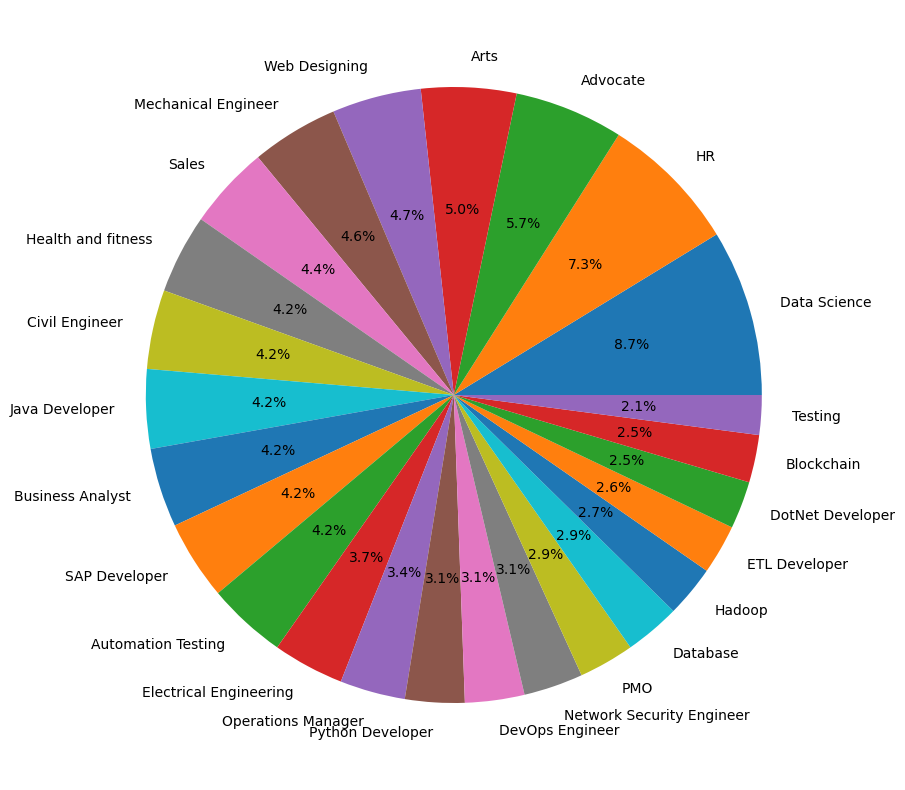

In [195]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

array([[<Axes: title={'center': 'target2'}>]], dtype=object)

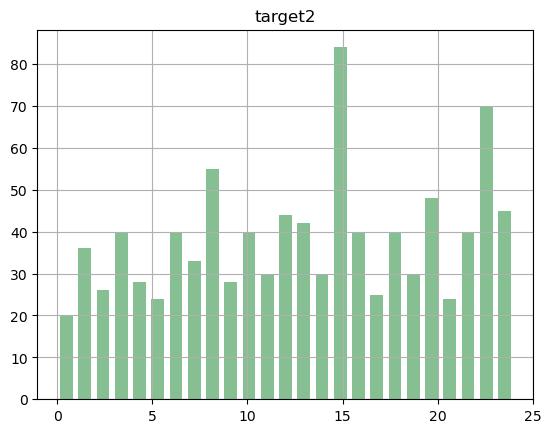

In [196]:
df.hist(column='target2', bins=25, grid=True, color='#86bf91', rwidth=0.7)

# model

In [197]:
target1 = df['target']
target2 = df['Category']

In [257]:
x_train, x_test, y_train, y_test=train_test_split(requredTaxt, target1, test_size=0.2)
xx_train, xx_test, yy_train, yy_test=train_test_split(requredTaxt, target2, test_size=0.2)

In [258]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=1000)
model1.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [259]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(xx_train, yy_train)

KNeighborsClassifier()

# Evalution models

In [265]:
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

0.8972691807542262
0.8808290155440415


In [266]:
print(model2.score(xx_train, yy_train))
print(model2.score(xx_test, yy_test))

0.9557867360208062
0.9119170984455959


In [267]:
prediction1=model1.predict(x_test)
ConfMatrix = confusion_matrix(y_test, prediction1)
print('ConfMatrix:\n', ConfMatrix)

ConfMatrix:
 [[79 11]
 [12 91]]


In [268]:
prediction2=model2.predict(xx_test)
ConfMatrix = confusion_matrix(yy_test, prediction2)
print('ConfMatrix:\n', ConfMatrix)

ConfMatrix:
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  2  0  0  1  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  2  3  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  1  0  0  0  1  0  0  0  0  1  0  0
   0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  

In [269]:
print(classification_report(y_test,prediction1))
print(classification_report(yy_test,prediction2))

              precision    recall  f1-score   support

      Accept       0.87      0.88      0.87        90
      reject       0.89      0.88      0.89       103

    accuracy                           0.88       193
   macro avg       0.88      0.88      0.88       193
weighted avg       0.88      0.88      0.88       193

                           precision    recall  f1-score   support

                 Advocate       1.00      0.75      0.86         4
                     Arts       1.00      1.00      1.00        10
       Automation Testing       1.00      0.60      0.75        10
               Blockchain       0.60      1.00      0.75         3
         Business Analyst       0.78      1.00      0.88         7
           Civil Engineer       1.00      1.00      1.00         3
             Data Science       1.00      0.58      0.74        12
                 Database       1.00      0.57      0.73         7
          DevOps Engineer       1.00      1.00      1.00        14
  

In [61]:
import pickle
pickle.dump(CVect, open('CVect.pkl','wb'))
pickle.dump(model1, open('clf.pkl', 'wb'))
pickle.dump(model2, open('clf1.pkl', 'wb'))